COMPARING THE ACCURACY OF ALL THE MODELS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("Thyroid_Diff.csv")
X = dataset.iloc[:, :-1]   #.values converts data into array, so to keep it as DAtafram dont include .values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.preprocessing import LabelEncoder
X_encoded = X.copy()
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X[column])

In [6]:
y_encoded = LabelEncoder().fit_transform(y)
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

In [11]:
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)

accuracy_results_sorted = dict(sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True))
accuracy_results_sorted

{'Random Forest': 0.948051948051948,
 'Logistic Regression': 0.922077922077922,
 'Support Vector Machine': 0.922077922077922,
 'Decision Tree': 0.9090909090909091,
 'K-Nearest Neighbors': 0.8961038961038961,
 'Naive Bayes': 0.8571428571428571}

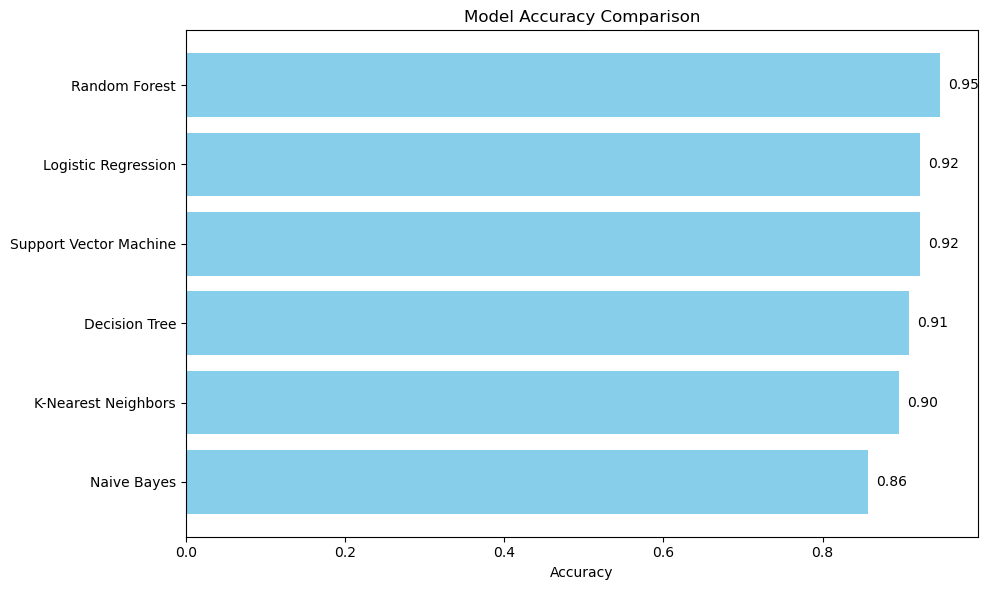

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results_sorted.keys()), list(accuracy_results_sorted.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.gca().invert_yaxis()  # Highest accuracy on top
for i, v in enumerate(accuracy_results_sorted.values()):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

C:\Users\Diya\AppData\Local\Temp\ipykernel_11656\2281676212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results_sorted.values()), y=list(accuracy_results_sorted.keys()), palette="viridis")


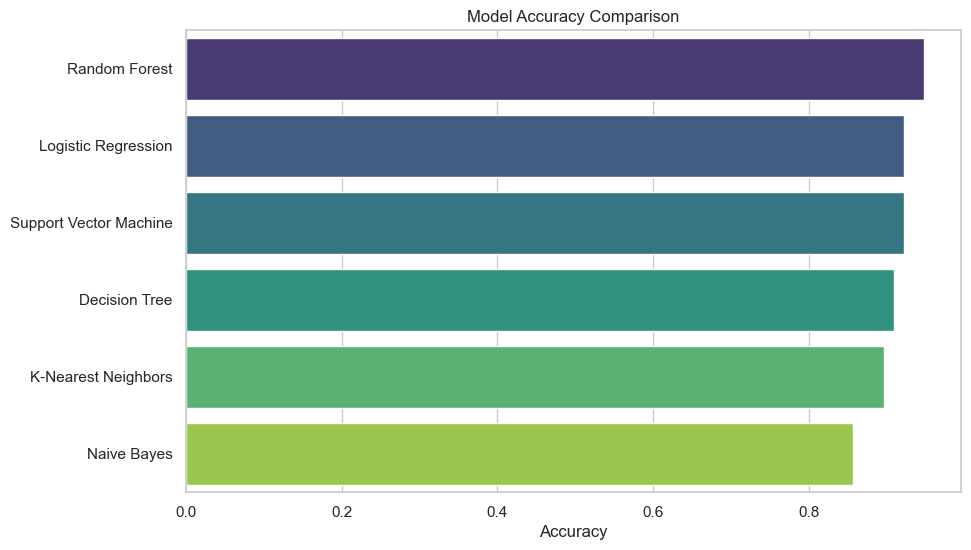

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_results_sorted.values()), y=list(accuracy_results_sorted.keys()), palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()